In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv('hasil_analisis_lengkap.csv')

print("📊 DATA OVERVIEW")
print(f"Shape: {df.shape}")
print("\nColumns:")
print(df.columns.tolist())

📊 DATA OVERVIEW
Shape: (285, 19)

Columns:
['Judul Berita', 'Tanggal Berita', 'Tag', 'Link', 'Raw Clean (POS/NER)', 'Sentiment Clean (Transformer)', 'Sentiment Before Stopwords', 'Sentiment After Stopwords', 'Tokens Before Stopwords', 'Tokens After Stopwords', 'Sentence Tokens', 'Word Tokens', 'POS Tags', 'NER', 'Sentiment Classic Simple', 'Sentiment Classic Weighted', 'Sentiment Classic', 'Sentiment Transformer', 'Ground Truth']


In [21]:
df.head()

,Judul Berita,Tanggal Berita,Tag,Link,Raw Clean (POS/NER),Sentiment Clean (Transformer),Sentiment Before Stopwords,Sentiment After Stopwords,Tokens Before Stopwords,Tokens After Stopwords,Sentence Tokens,Word Tokens,POS Tags,NER,Sentiment Classic Simple,Sentiment Classic Weighted,Sentiment Classic,Sentiment Transformer,Ground Truth
0,ASDP dan Operator Ferry Swasta Perkuat Data Ma...,8/12/2025 0:00,"ASDP, kapal ferry, manifest penumpang, operato...",https://money.kompas.com/read/2025/08/12/15391...,"JAKARTA, KOMPAS.com Manifest penumpang dan ken...","jakarta, kompas.com manifest penumpang dan ken...","jakarta , kompas.com manifest penumpang dan ke...",jakarta kompas com manifest tumpang kendara d...,"['jakarta', ',', 'kompas.com', 'manifest', 'pe...","['jakarta', '', 'kompas com', 'manifest', 'tum...","['JAKARTA, KOMPAS.com Manifest penumpang dan k...","['JAKARTA', ',', 'KOMPAS.com', 'Manifest', 'pe...","[('JAKARTA', 'PROPN'), (',', 'PUNCT'), ('KOMPA...","[{'entity_group': 'GPE', 'score': np.float32(0...",Positive,Positive,Positive,Negative,Positive
1,"Listrik di Pulau Enggano Sudah 24 Jam, Kapal F...",7/8/2025 0:00,"pulau enggano, Bio Solar, Pelabuhan Pulau Baai...",https://regional.kompas.com/read/2025/07/08/10...,"BENGKULU, KOMPAS.com Kepala Desa Kaana, Alamud...","bengkulu, kompas.com kepala desa kaana, alamud...","bengkulu , kompas.com kepala desa kaana , alam...",bengkulu kompas com kepala desa kaana alamud...,"['bengkulu', ',', 'kompas.com', 'kepala', 'des...","['bengkulu', '', 'kompas com', 'kepala', 'desa...","['BENGKULU, KOMPAS.com Kepala Desa Kaana, Alam...","['BENGKULU', ',', 'KOMPAS.com', 'Kepala', 'Des...","[('BENGKULU', 'PROPN'), (',', 'PUNCT'), ('KOMP...",[],Positive,Positive,Positive,Neutral,Positive
2,"Ombak Hingga 2,5 Meter Hambat Pencarian KMP Tu...",2025-07-03 02:09:12+00:00,"Berita Terkini, Berita Hari Ini, Berita Harian...",https://video.kompas.com/watch/1858879/ombak-h...,"KMP Tunu Pratama Jaya tenggelam di Selat Bali,...","kmp tunu pratama jaya tenggelam di selat bali,...",kmp tunu pratama jaya tenggelam di selat bali ...,kmp tunu pratama jaya tenggelam selat bal rab...,"['kmp', 'tunu', 'pratama', 'jaya', 'tenggelam'...","['kmp', 'tunu', 'pratama', 'jaya', 'tenggelam'...",['KMP Tunu Pratama Jaya tenggelam di Selat Bal...,"['KMP', 'Tunu', 'Pratama', 'Jaya', 'tenggelam'...","[('KMP', 'PROPN'), ('Tunu', 'PROPN'), ('Pratam...","[{'entity_group': 'PRD', 'score': np.float32(0...",Negative,Negative,Negative,Negative,Negative
3,Rute Ferry Batam–Johor Direncanakan Aktif Tahu...,5/23/2025 0:00,"kapal ferry, batam johor bahru ferry schedule,...",https://money.kompas.com/read/2025/05/23/22053...,KOMPAS.com PT Angkutan Sungai Danau dan Penyeb...,kompas.com pt angkutan sungai danau dan penyeb...,kompas.com pt angkutan sungai danau dan penyeb...,kompas com pt angkut sungai danau seberang asd...,"['kompas.com', 'pt', 'angkutan', 'sungai', 'da...","['kompas com', 'pt', 'angkut', 'sungai', 'dana...",['KOMPAS.com PT Angkutan Sungai Danau dan Peny...,"['KOMPAS.com', 'PT', 'Angkutan', 'Sungai', 'Da...","[('KOMPAS.com', 'PROPN'), ('PT', 'PROPN'), ('A...","[{'entity_group': 'ORG', 'score': np.float32(0...",Positive,Positive,Positive,Negative,Positive
4,"Menyeberangi Danau Toba, Perjalanan Naik Kapal...",5/16/2025 0:00,"kapal dari ajibata ke tomok, kapal ferry pelab...",https://travel.kompas.com/read/2025/05/16/0707...,KOMPAS.com Kala melihat kapal berwarna hijau t...,kompas.com kala melihat kapal berwarna hijau t...,kompas.com kala melihat kapal berwarna hijau t...,kompas com kapal warna hijau sandar labuh kem...,"['kompas.com', 'kala', 'melihat', 'kapal', 'be...","['kompas com', 'kapal', 'warna', 'hijau', 'san...",['KOMPAS.com Kala melihat kapal berwarna hijau...,"['KOMPAS.com', 'Kala', 'melihat', 'kapal', 'be...","[('KOMPAS.com', 'PROPN'), ('Kala', 'PROPN'), (...",[],Positive,Positive,Positive,Neutral,Positive



 2. POS TAGGING & NER ANALYSIS
 POS TAGS DISTRIBUTION


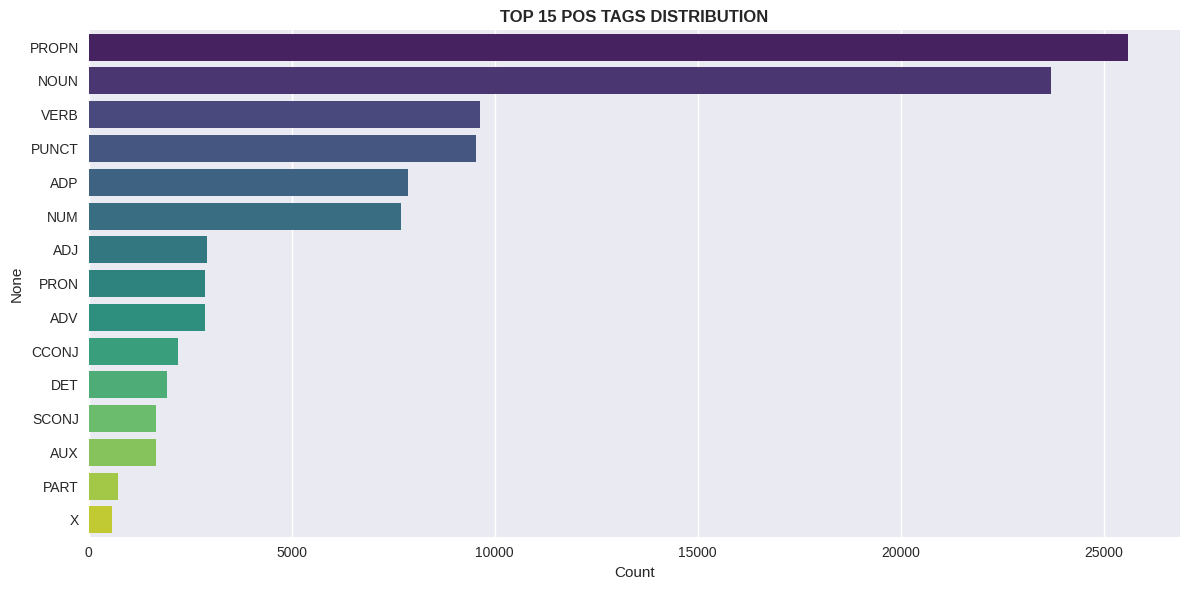

Total POS Tags found: 15
Top 5 POS Tags: {'PROPN': 25598, 'NOUN': 23697, 'VERB': 9649, 'PUNCT': 9552, 'ADP': 7857}

 NAMED ENTITY RECOGNITION


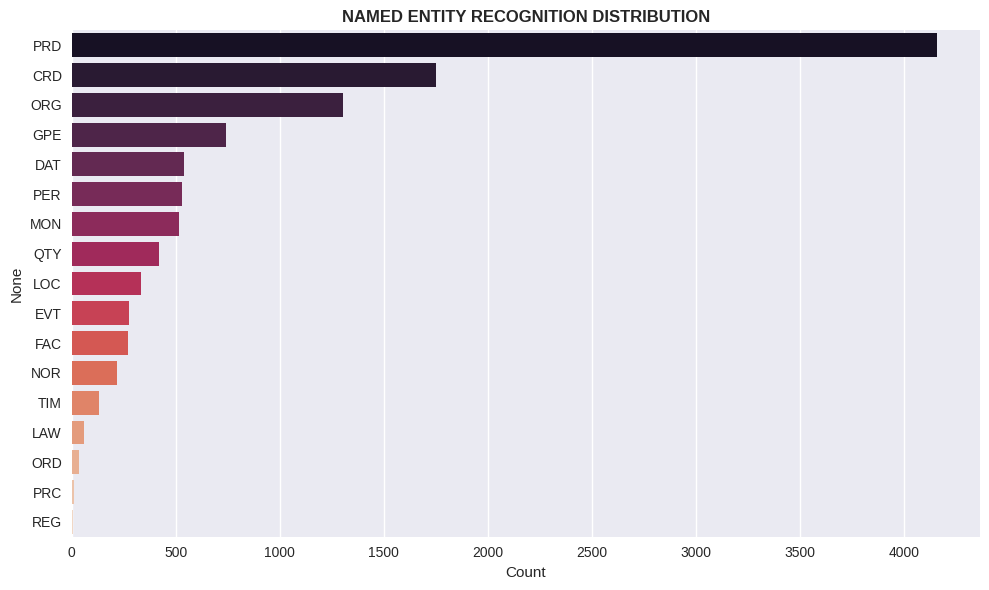

Total Entity Types: 17
Entity Distribution: {'PRD': 4157, 'CRD': 1753, 'ORG': 1304, 'GPE': 741, 'DAT': 541, 'PER': 529, 'MON': 514, 'QTY': 419, 'LOC': 333, 'EVT': 277, 'FAC': 270, 'NOR': 217, 'TIM': 134, 'LAW': 62, 'ORD': 35, 'PRC': 13, 'REG': 5}


In [34]:
# 1. POS TAGGING & NER VISUALIZATION
# =============================
print("\n 2. POS TAGGING & NER ANALYSIS")
print("=" * 50)

# 2.1 POS TAGGING VISUALIZATION
print(" POS TAGS DISTRIBUTION")

def visualize_pos_tags(pos_series):
    """Visualisasi distribusi POS Tags"""
    all_pos_tags = []

    for tags in pos_series.dropna():
        try:
            if isinstance(tags, str):
                tags = eval(tags)  # Convert string ke list
            for word, pos in tags:
                all_pos_tags.append(pos)
        except:
            continue

    pos_counts = pd.Series(all_pos_tags).value_counts().head(15)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=pos_counts.values, y=pos_counts.index, palette='viridis')
    plt.title('TOP 15 POS TAGS DISTRIBUTION', fontweight='bold')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

    return pos_counts

pos_stats = visualize_pos_tags(df['POS Tags'])
print(f"Total POS Tags found: {len(pos_stats)}")
print(f"Top 5 POS Tags: {pos_stats.head(5).to_dict()}")

# 2.2 NER VISUALIZATION
print("\n NAMED ENTITY RECOGNITION")

def visualize_ner(ner_series):
    """Visualisasi distribusi NER"""
    all_entities = []

    for entities in ner_series.dropna():
        try:
            if isinstance(entities, str):
                entities = eval(entities)
            for entity in entities:
                if isinstance(entity, dict):
                    all_entities.append(entity.get('entity_group', 'UNKNOWN'))
        except:
            continue

    entity_counts = pd.Series(all_entities).value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=entity_counts.values, y=entity_counts.index, palette='rocket')
    plt.title('NAMED ENTITY RECOGNITION DISTRIBUTION', fontweight='bold')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

    return entity_counts

ner_stats = visualize_ner(df['NER'])
print(f"Total Entity Types: {len(ner_stats)}")
print(f"Entity Distribution: {ner_stats.to_dict()}")


COMPREHENSIVE SENTIMENT ANALYSIS EVALUATION

1. EVALUATING EXISTING SENTIMENT METHODS
----------------------------------------
GROUND TRUTH AVAILABLE
   Sentiment Classic:
     Accuracy:  0.4351 (43.51%)
     Precision: 0.4101
     Recall:    0.4351
     F1-Score:  0.3561
   Sentiment Transformer:
     Accuracy:  0.4351 (43.51%)
     Precision: 0.2983
     Recall:    0.4351
     F1-Score:  0.3517

BEST EXISTING METHOD: Sentiment Classic (Accuracy: 43.51%)
Need better models: YES

2. EVALUATING ALTERNATIVE ML MODELS
----------------------------------------
Training ML Models...
   Logistic Regression:
     Accuracy:  0.6279 (62.79%)
     Precision: 0.6600
     Recall:    0.6279
     F1-Score:  0.6341
   SVM Linear:
     Accuracy:  0.6395 (63.95%)
     Precision: 0.6712
     Recall:    0.6395
     F1-Score:  0.6440
   Random Forest:
     Accuracy:  0.7209 (72.09%)
     Precision: 0.7339
     Recall:    0.7209
     F1-Score:  0.7234
   Naive Bayes:
     Accuracy:  0.6512 (65.12%)
     Pr

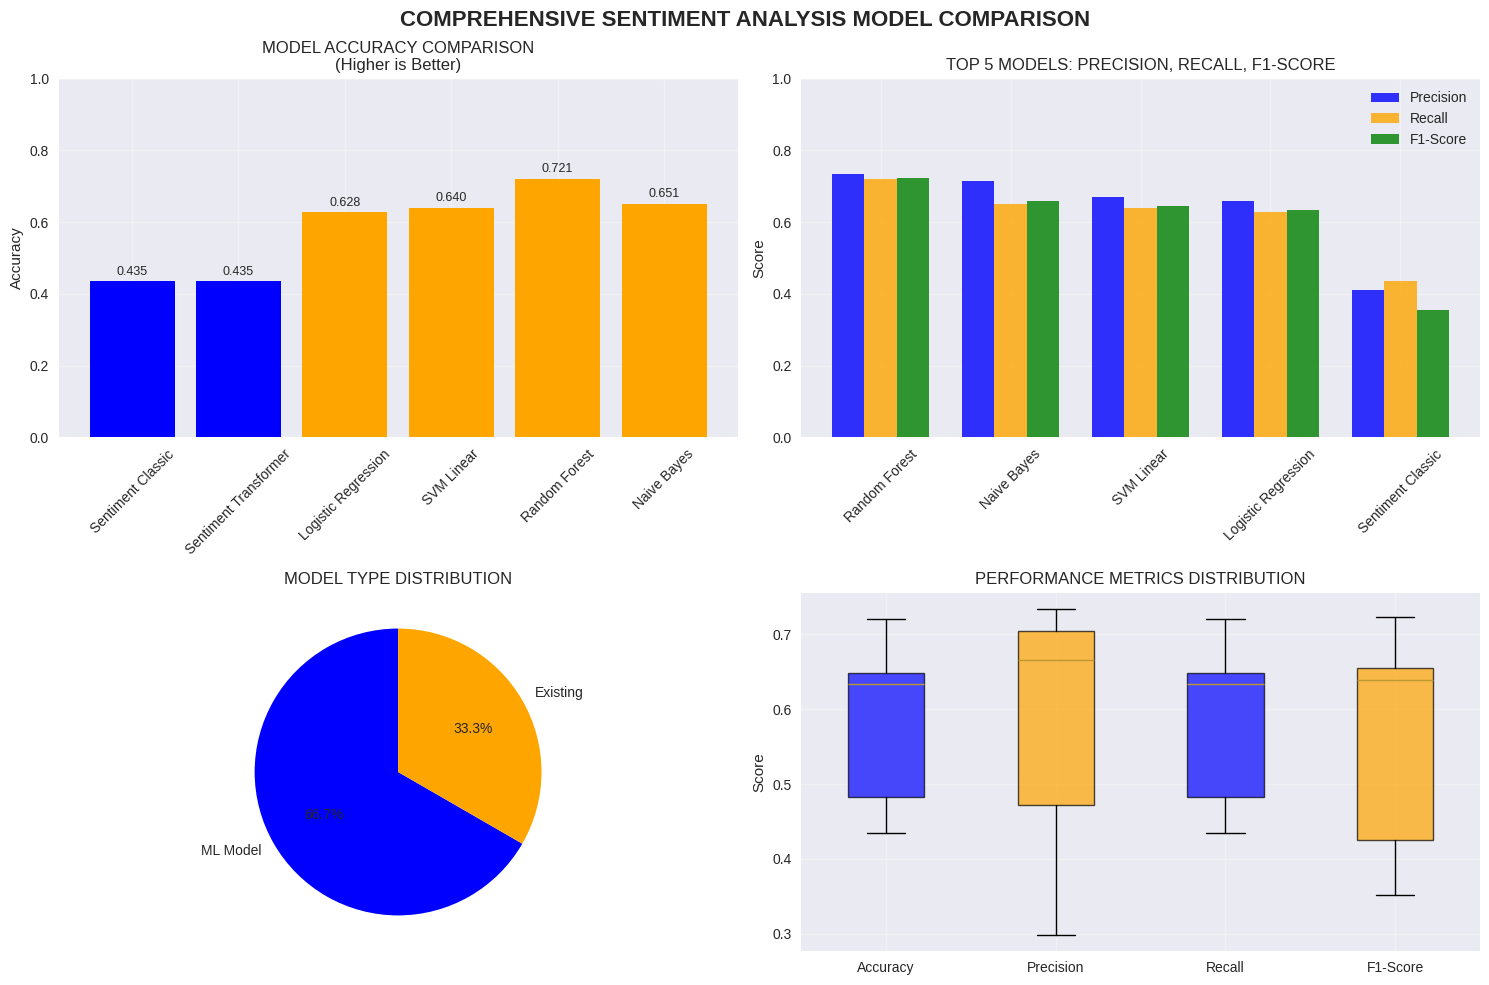


4. CONFUSION MATRIX - BEST OVERALL MODEL
----------------------------------------
Best Overall Model: Random Forest
Best Accuracy: 0.7209 (72.09%)


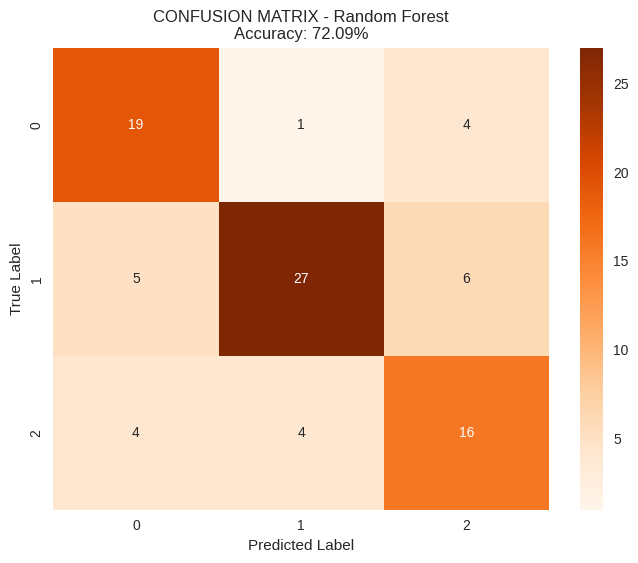


5. COMPREHENSIVE RESULTS SUMMARY TABLE

RANKED MODEL PERFORMANCE:
                Model     Type        Accuracy       Precision          Recall        F1-Score
        Random Forest ML Model 0.7209 (72.09%) 0.7339 (73.39%) 0.7209 (72.09%) 0.7234 (72.34%)
          Naive Bayes ML Model 0.6512 (65.12%) 0.7158 (71.58%) 0.6512 (65.12%) 0.6583 (65.83%)
           SVM Linear ML Model 0.6395 (63.95%) 0.6712 (67.12%) 0.6395 (63.95%) 0.6440 (64.40%)
  Logistic Regression ML Model 0.6279 (62.79%) 0.6600 (66.00%) 0.6279 (62.79%) 0.6341 (63.41%)
Sentiment Transformer Existing 0.4351 (43.51%) 0.2983 (29.83%) 0.4351 (43.51%) 0.3517 (35.17%)
    Sentiment Classic Existing 0.4351 (43.51%) 0.4101 (41.01%) 0.4351 (43.51%) 0.3561 (35.61%)

Full results saved to 'sentiment_analysis_comprehensive_results.csv'

FINAL RECOMMENDATIONS:
   Best Model: Random Forest
   Best Accuracy: 72.09%
   Model Type: ML Model
   Status: GOOD - Suitable for most applications


In [35]:
# =============================
# COMPREHENSIVE SENTIMENT ANALYSIS EVALUATION
# =============================
print("\nCOMPREHENSIVE SENTIMENT ANALYSIS EVALUATION")
print("=" * 60)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import numpy as np

# Initialize results storage
results_summary = []

# =============================
# 1. EVALUATE EXISTING METHODS
# =============================
print("\n1. EVALUATING EXISTING SENTIMENT METHODS")
print("-" * 40)

if 'Ground Truth' in df.columns:
    print("GROUND TRUTH AVAILABLE")

    # Evaluasi metode existing
    methods_to_evaluate = {
        'Sentiment Classic': df['Sentiment Classic'],
        'Sentiment Transformer': df['Sentiment Transformer']
    }

    for method_name, predictions in methods_to_evaluate.items():
        accuracy = accuracy_score(df['Ground Truth'], predictions)
        precision = precision_score(df['Ground Truth'], predictions, average='weighted', zero_division=0)
        recall = recall_score(df['Ground Truth'], predictions, average='weighted', zero_division=0)
        f1 = f1_score(df['Ground Truth'], predictions, average='weighted', zero_division=0)

        results_summary.append({
            'Model': method_name,
            'Type': 'Existing',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

        print(f"   {method_name}:")
        print(f"     Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"     Precision: {precision:.4f}")
        print(f"     Recall:    {recall:.4f}")
        print(f"     F1-Score:  {f1:.4f}")

    # Tentukan method terbaik existing
    best_existing = max([r for r in results_summary if r['Type'] == 'Existing'], key=lambda x: x['Accuracy'])
    print(f"\nBEST EXISTING METHOD: {best_existing['Model']} (Accuracy: {best_existing['Accuracy']:.2%})")

    # Check if we need better models
    need_better_model = best_existing['Accuracy'] < 0.75
    print(f"Need better models: {'YES' if need_better_model else 'NO'}")

else:
    print("NO GROUND TRUTH - SKIPPING QUANTITATIVE EVALUATION")
    agreement = (df['Sentiment Classic'] == df['Sentiment Transformer']).mean()
    print(f"   Classic vs Transformer Agreement: {agreement:.4f} ({agreement*100:.2f}%)")
    need_better_model = False

# =============================
# 2. EVALUATE ALTERNATIVE ML MODELS (If needed and ground truth available)
# =============================
if 'Ground Truth' in df.columns and need_better_model:
    print(f"\n2. EVALUATING ALTERNATIVE ML MODELS")
    print("-" * 40)

    def evaluate_ml_models(X, y, models_dict):
        """Evaluate multiple ML models and return results"""
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        results = {}

        for name, model in models_dict.items():
            try:
                # Train model
                model.fit(X_train, y_train)

                # Predict
                y_pred = model.predict(X_test)

                # Evaluate
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

                results[name] = {
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1,
                    'model': model,
                    'predictions': y_pred,
                    'true_labels': y_test
                }

                # Add to summary
                results_summary.append({
                    'Model': name,
                    'Type': 'ML Model',
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-Score': f1
                })

                print(f"   {name}:")
                print(f"     Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
                print(f"     Precision: {precision:.4f}")
                print(f"     Recall:    {recall:.4f}")
                print(f"     F1-Score:  {f1:.4f}")

            except Exception as e:
                print(f"   {name}: Error - {e}")

        return results

    # Prepare data for ML models
    vectorizer = TfidfVectorizer(max_features=1000, min_df=2, max_df=0.8)
    X = vectorizer.fit_transform(df['Raw Clean (POS/NER)'].fillna(''))
    y = df['Ground Truth']

    # Define models to test
    ml_models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM Linear': SVC(kernel='linear', random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
        'Naive Bayes': MultinomialNB(),
        'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss')
    }

    print("Training ML Models...")
    ml_results = evaluate_ml_models(X, y, ml_models)

    if ml_results:
        best_ml_model = max(ml_results.keys(), key=lambda x: ml_results[x]['accuracy'])
        best_ml_accuracy = ml_results[best_ml_model]['accuracy']
        print(f"\nBEST ML MODEL: {best_ml_model} (Accuracy: {best_ml_accuracy:.2%})")

# =============================
# 3. COMPREHENSIVE VISUALIZATION
# =============================
print(f"\n3. COMPREHENSIVE RESULTS VISUALIZATION")
print("-" * 40)

if results_summary:
    # Convert to DataFrame
    results_df = pd.DataFrame(results_summary)

    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('COMPREHENSIVE SENTIMENT ANALYSIS MODEL COMPARISON', fontsize=16, fontweight='bold')

    # Plot 1: Accuracy Comparison
    models_plot = results_df['Model']
    accuracy_plot = results_df['Accuracy']

    bars1 = axes[0,0].bar(models_plot, accuracy_plot, color=['blue' if 'Existing' in str(t) else 'orange' for t in results_df['Type']])
    axes[0,0].set_title('MODEL ACCURACY COMPARISON\n(Higher is Better)')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].set_ylim(0, 1)
    axes[0,0].grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, acc in zip(bars1, accuracy_plot):
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                      f'{acc:.3f}', ha='center', va='bottom', fontsize=9)

    # Plot 2: Precision, Recall, F1 Comparison (for top models)
    top_models = results_df.nlargest(5, 'Accuracy')
    x_pos = np.arange(len(top_models))
    width = 0.25

    axes[0,1].bar(x_pos - width, top_models['Precision'], width, label='Precision', alpha=0.8, color='blue')
    axes[0,1].bar(x_pos, top_models['Recall'], width, label='Recall', alpha=0.8, color='orange')
    axes[0,1].bar(x_pos + width, top_models['F1-Score'], width, label='F1-Score', alpha=0.8, color='green')
    axes[0,1].set_title('TOP 5 MODELS: PRECISION, RECALL, F1-SCORE')
    axes[0,1].set_ylabel('Score')
    axes[0,1].set_xticks(x_pos)
    axes[0,1].set_xticklabels(top_models['Model'], rotation=45)
    axes[0,1].legend()
    axes[0,1].set_ylim(0, 1)
    axes[0,1].grid(True, alpha=0.3)

    # Plot 3: Model Type Distribution
    type_counts = results_df['Type'].value_counts()
    axes[1,0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
    axes[1,0].set_title('MODEL TYPE DISTRIBUTION')

    # Plot 4: Performance Range
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    performance_data = [results_df[metric] for metric in metrics]

    box_plot = axes[1,1].boxplot(performance_data, labels=metrics, patch_artist=True)
    colors = ['blue', 'orange', 'blue', 'orange']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[1,1].set_title('PERFORMANCE METRICS DISTRIBUTION')
    axes[1,1].set_ylabel('Score')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# =============================
# 4. CONFUSION MATRIX FOR BEST MODEL
# =============================
if 'Ground Truth' in df.columns and results_summary:
    print(f"\n4. CONFUSION MATRIX - BEST OVERALL MODEL")
    print("-" * 40)

    best_overall = results_df.loc[results_df['Accuracy'].idxmax()]
    best_model_name = best_overall['Model']

    print(f"Best Overall Model: {best_model_name}")
    print(f"Best Accuracy: {best_overall['Accuracy']:.4f} ({best_overall['Accuracy']*100:.2f}%)")

    # Get predictions for best model
    if best_model_name in ['Sentiment Classic', 'Sentiment Transformer']:
        # Existing models
        best_predictions = df[best_model_name]
        best_true = df['Ground Truth']

        cm = confusion_matrix(best_true, best_predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'CONFUSION MATRIX - {best_model_name}\nAccuracy: {best_overall["Accuracy"]:.2%}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    elif 'ml_results' in locals() and best_model_name in ml_results:
        # ML models
        cm = confusion_matrix(ml_results[best_model_name]['true_labels'],
                             ml_results[best_model_name]['predictions'])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
        plt.title(f'CONFUSION MATRIX - {best_model_name}\nAccuracy: {best_overall["Accuracy"]:.2%}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

# =============================
# 5. FINAL SUMMARY TABLE
# =============================
print(f"\n5. COMPREHENSIVE RESULTS SUMMARY TABLE")
print("=" * 60)

if results_summary:
    summary_df = pd.DataFrame(results_summary)

    # Sort by Accuracy descending
    summary_df = summary_df.sort_values('Accuracy', ascending=False)

    # Format the table for better display
    display_df = summary_df.copy()
    for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
        display_df[col] = display_df[col].apply(lambda x: f'{x:.4f} ({x*100:.2f}%)')

    print("\nRANKED MODEL PERFORMANCE:")
    print(display_df.to_string(index=False))

    # Save to CSV
    summary_df.to_csv('sentiment_analysis_comprehensive_results.csv', index=False)
    print(f"\nFull results saved to 'sentiment_analysis_comprehensive_results.csv'")

    # Final recommendations
    print(f"\nFINAL RECOMMENDATIONS:")
    print(f"   Best Model: {summary_df.iloc[0]['Model']}")
    print(f"   Best Accuracy: {summary_df.iloc[0]['Accuracy']:.2%}")
    print(f"   Model Type: {summary_df.iloc[0]['Type']}")

    if summary_df.iloc[0]['Accuracy'] >= 0.8:
        print("   Status: EXCELLENT - Ready for production use")
    elif summary_df.iloc[0]['Accuracy'] >= 0.7:
        print("   Status: GOOD - Suitable for most applications")
    elif summary_df.iloc[0]['Accuracy'] >= 0.6:
        print("   Status: MODERATE - Consider improvements")
    else:
        print("   Status: POOR - Needs significant improvement")

else:
    print("No results to display. Please check if Ground Truth is available.")

print("=" * 60)